In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("bank.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
dataset.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no


In [5]:
import seaborn as sns
sns.set()

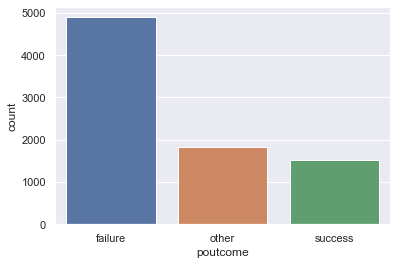

In [6]:
sns.countplot(dataset["poutcome"])

In [7]:
# as we can clearly see that poucome is mostly falling in unknown catergory so we can remove it.
#it will make our model little faster and might improve accurracy also
dataset.drop("poutcome", axis=1, inplace = True)

In [8]:
dataset.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,no


In [9]:
#dataset["contact"]= dataset["contact"].str.replace("unknown", "NaN", case = False)

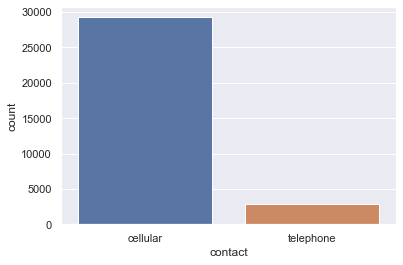

In [10]:
sns.countplot(dataset["contact"])

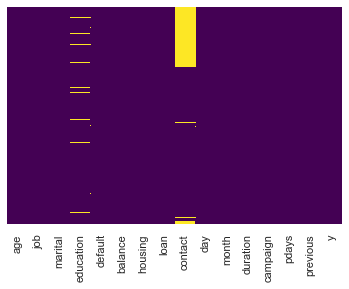

In [11]:
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False , cmap='viridis')
# we have to clear our data before using nerual network

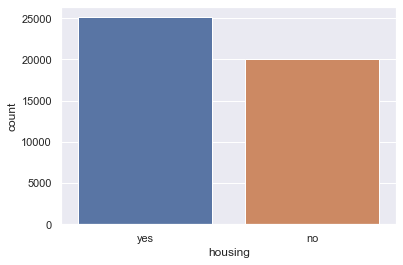

In [12]:
sns.countplot(dataset["housing"])

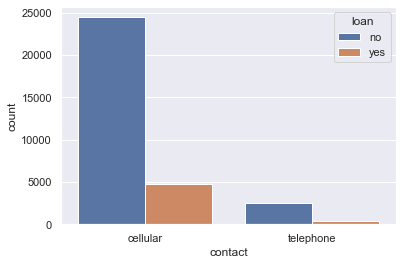

In [13]:
sns.countplot(dataset['contact'], hue='loan', data=dataset)

In [14]:
#Using feature engineering to Replacing the data which is not present

def func(cols):
    contact = cols[0]
    loan = cols[1]
    if pd.isnull(contact):
        if loan == "no":
            return "cellular"
        else:
            return "telephone"
    else:
        return contact
    

In [15]:
dataset["contact"] = dataset[["contact", "loan"]].apply(func , axis=1)

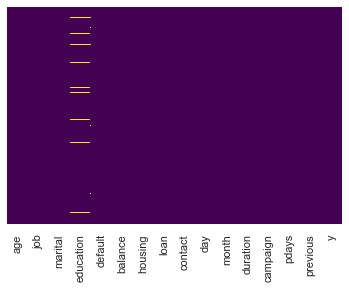

In [16]:
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False , cmap='viridis')

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  y          45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [18]:
dataset = dataset.dropna()
# we can drop the records which education we don't have as the NaN records are less and not every record is very important

In [19]:
y = dataset["y"] #Predicted
y = pd.get_dummies(y, drop_first=True)

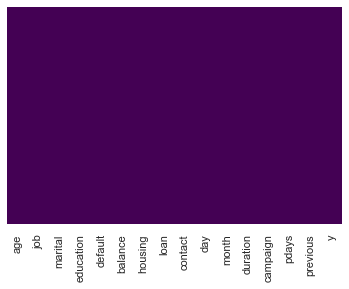

In [20]:
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False , cmap='viridis')
#now our data is prefectly cleaned

In [21]:
dataset = dataset[["age", "job", "marital", "education", "default", "balance", "housing", "loan", "contact", "day", "month", "duration", "campaign", "pdays", "previous"]]

In [22]:
dataset.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,telephone,5,may,76,1,-1,0
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,-1,0


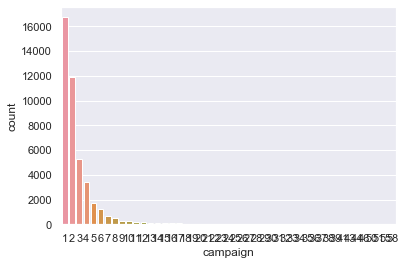

In [23]:
sns.countplot(dataset["campaign"])

In [24]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,telephone,5,may,76,1,-1,0
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,-1,0
6,28,management,single,tertiary,no,447,yes,yes,telephone,5,may,217,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0


In [25]:
#converting into dummy variables so that we don't get into dummy variable trap
#droping one columnd to remove collinearity
education = dataset["education"]
education = pd.get_dummies(education, drop_first=True)

In [26]:
marital = dataset["marital"]
marital = pd.get_dummies(marital, drop_first=True)

In [27]:
default = dataset["default"]
default = pd.get_dummies(default, drop_first=True)

In [28]:
housing = dataset["housing"]
housing = pd.get_dummies(housing, drop_first=True)

In [29]:
loan = dataset["loan"]
loan = pd.get_dummies(loan, drop_first=True)

In [30]:
contact = dataset["contact"]
contact = pd.get_dummies(contact, drop_first=True)

In [31]:
job = dataset["job"]
job = pd.get_dummies(job, drop_first=True)

In [32]:
month = dataset["month"]
month = pd.get_dummies(month, drop_first=True)

In [33]:
X = pd.concat([job, marital, education, default, dataset["balance"], housing, loan, contact, dataset["day"], month, dataset["duration"], dataset["campaign"], dataset["duration"]] ,  axis=1)

In [34]:
X.columns

Index(['blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'married', 'single', 'secondary', 'tertiary', 'yes', 'balance', 'yes',
       'yes', 'telephone', 'day', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'duration', 'campaign', 'duration'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X.shape

(43193, 34)

In [37]:
y.shape

(43193, 1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [40]:
model = Sequential()

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   blue-collar    43193 non-null  uint8
 1   entrepreneur   43193 non-null  uint8
 2   housemaid      43193 non-null  uint8
 3   management     43193 non-null  uint8
 4   retired        43193 non-null  uint8
 5   self-employed  43193 non-null  uint8
 6   services       43193 non-null  uint8
 7   student        43193 non-null  uint8
 8   technician     43193 non-null  uint8
 9   unemployed     43193 non-null  uint8
 10  married        43193 non-null  uint8
 11  single         43193 non-null  uint8
 12  secondary      43193 non-null  uint8
 13  tertiary       43193 non-null  uint8
 14  yes            43193 non-null  uint8
 15  balance        43193 non-null  int64
 16  yes            43193 non-null  uint8
 17  yes            43193 non-null  uint8
 18  telephone      43193 non-null  uint8
 19  day 

In [42]:
#Adding Hidden layers
model.add(Dense(units=100, input_dim=34, activation="relu"))
model.add(Dense(units=80, activation="relu"))
model.add(Dense(units=60, activation="relu"))
model.add(Dense(units=40, activation="relu"))
model.add(Dense(units=20, activation="relu"))
model.add(Dense(units=10, activation="relu"))
model.add(Dense(units=5, activation="relu"))
model.add(Dense(units=5, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [43]:
model.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])

In [44]:
model.fit(X_train, y_train, epochs=1, batch_size=1)

Epoch 1/1
32394/32394 [==============================] - 155s 5ms/step - loss: 0.3633 - accuracy: 0.8830


In [45]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy: %.2f%%', test_acc)

10799/10799 [==============================] - 0s 40us/step
Test accuracy: %.2f%% 0.8854523301124573


SyntaxError: invalid syntax (<ipython-input-49-b6d5db7c397c>, line 1)

In [54]:
pred = model.evaluate(X_test, y_test)

10799/10799 [==============================] - 0s 38us/step


In [55]:
#this functin gives loss and accuracy

[0.35593640583236413, 0.8854523301124573]

In [57]:
print(pred[1]*100)

88.54523301124573


In [68]:
acc = print("%.2f%%" % (test_acc*100))

88.55%


In [72]:
f = open("prediction.txt", "w")
f.write(str(pred[1]*100))
f.close()